
# 13.4: Decomposing a sound wave into Fourier Series

In [17]:

%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

import numpy as np
from ch13.functions import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from math import sin, cos, pi, tan

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=1)

pygame 2.0.0.dev10 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


Testing perpendicularity of c and s basis functions:

In [4]:
round(inner_product(s(1), c(1)))

0

In [6]:
round(inner_product(s(1), s(2)))

0

In [7]:
round(inner_product(c(1), c(2)))

0

In [8]:
round(inner_product(c(1), s(2)))

0

In [9]:
round(inner_product(s(1), c(5)))

0

Confirming dot prod = 1 if multiplying basis functions by themselves

In [10]:
round(inner_product(s(1), s(1)))

1

In [11]:
round(inner_product(c(1), c(1)))

1

In [13]:
round(inner_product(const_basis, const_basis))

1

In [14]:

round(inner_product(const_basis, s(1)))

0

In [15]:
round(inner_product(const_basis, c(1)))

0

Testing fourier coefficients

In [18]:
f = fourier_series(0, [2,3,4], [5,6,7])
fourier_coefficients(f, 3)

(-4.250072516143177e-15,
 [1.9999999999999913, 2.9999999999999987, 3.9999999999999982],
 [5.000000000000003, 6.000000000000002, 7.000000000000003])

What happens with an extra coefficient?

In [19]:
fourier_coefficients(f, 4) #Its 0!!!

(-4.250072516143177e-15,
 [1.9999999999999913,
  2.9999999999999987,
  3.9999999999999982,
  2.643718577388654e-15],
 [5.000000000000003,
  6.000000000000002,
  7.000000000000003,
  -5.244340118421009e-15])

What about just sin? Will it be 1, or 2*pi?

In [20]:
fourier_coefficients(sin, 3) # seems to be random values

(0.6495156496174923,
 [-0.024735341720250218, -0.0067007910048869235, -0.0034364684197542347],
 [-0.2748086591910113, -0.13477599443872545, -0.08953219466408129])

In [21]:
1 / (2 * pi)

0.15915494309189535

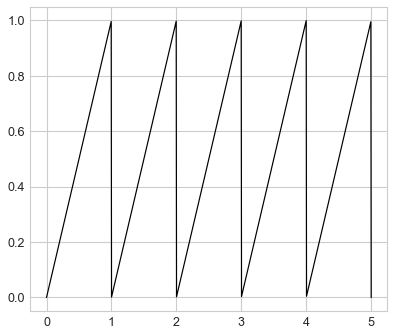

In [33]:
f = lambda t: t % 1
plot_function(f, 0, 5, c='black')

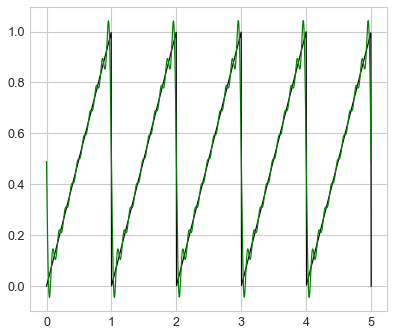

In [36]:
a0, an, bn = fourier_coefficients(f, 10)
plot_function(f, 0, 5, c='black')
plot_function(fourier_series(a0, an, bn), 0, 5, c='green')